In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from fig03_helpers import generate_mixed_gaussian_alternative, plot_colored_histograms

import sys
sys.path.append("..")
from Helpers.EnvInterface import value_encode, value_decode, denormalize, normalize


In [2]:

# Define the mixed Gaussian distribution parameters
# 4 Gaussian components with means in [-1, 1] range
means = np.array([-0.7, -0.2, 0.2, 0.7])  # μ_i, i=0,1,2,3
stds = np.array([0.1, 0.1, 0.1, 0.1])    # σ_i, i=0,1,2,3
weights = np.array([0.25, 0.5, 0.25, 0.5])  # Mixing weights (must sum to 1)
weights = weights / np.sum(weights)

print(f"Means (μ_i): {means}")
print(f"Standard deviations (σ_i): {stds}")
print(f"Mixing weights: {weights}")
print(f"Sum of weights: {np.sum(weights):.3f}")

# Generate Monte Carlo samples
n_samples = 10000
samples = generate_mixed_gaussian_alternative(n_samples, means, stds, weights)
samples = np.clip(samples, -1, 1)

Means (μ_i): [-0.7 -0.2  0.2  0.7]
Standard deviations (σ_i): [0.1 0.1 0.1 0.1]
Mixing weights: [0.16666667 0.33333333 0.16666667 0.33333333]
Sum of weights: 1.000


In [3]:
def sample_codec(samples, n_bits, base, noise_std=0.5):
    samples_enc = value_encode(samples, -1, 1, n_bits, b=base)
    samples_enc_norm = normalize(samples_enc, 0, base-1)

    samples_enc_norm_noise =  samples_enc_norm + np.random.randn(len(samples_enc_norm)) * noise_std

    samples_enc_denorm = denormalize(samples_enc_norm_noise, 0, base-1)
    samples_dec = value_decode(samples_enc_denorm, -1.0, 1.0, n_bits, b=base)

    return samples_enc_norm, samples_dec

6561 8000


'\nif verbose:\n    samples_enc_norm_visual = samples_enc_norm.reshape(-1, n_bits)\n    (N, n_bits) = samples_enc_norm_visual.shape\n    for i in range(n_bits):\n        plot_colored_histogram(samples_enc_norm_visual[:, i] + np.random.randn(N) * 0.05, bins=bins, figsize=(3, 1))\n'

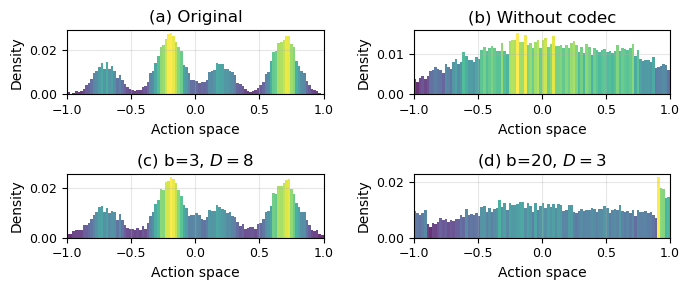

In [4]:
noise_std = 0.3
bins = 100
verbose = False

samples_enc_norm, samples_dec = sample_codec(samples, n_bits=8, base=3, noise_std=noise_std)
_, samples_dec_ = sample_codec(samples, n_bits=3, base=20, noise_std=noise_std)
print(3**8, 20**3)

figsize = (7, 3)
plot_colored_histograms(
    [samples, 
     samples + np.random.randn(len(samples)) * noise_std,
     samples_dec,
     samples_dec_], bins=100, ncols=2, nrows=2, figsize=figsize, 
     subtitles=['(a) Original', '(b) Without codec', '(c) b=3, $D=8$', '(d) b=20, $D=3$'], display=False)
plt.savefig('C:/Users/Ye/Documents/YuYeh_Documents/L2S/Conference_Writing/Globecom25_workshop/Diffusion policy for intra-slice resource scheduling/Figures/fig03_encode_action.png', dpi=300)


'''
if verbose:
    samples_enc_norm_visual = samples_enc_norm.reshape(-1, n_bits)
    (N, n_bits) = samples_enc_norm_visual.shape
    for i in range(n_bits):
        plot_colored_histogram(samples_enc_norm_visual[:, i] + np.random.randn(N) * 0.05, bins=bins, figsize=(3, 1))
'''